<a href="https://colab.research.google.com/github/Saurabh-Bagchi/Traffic-Sign-Classification.keras/blob/master/Questions_Project_1_Computer_Vision_JPMC_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (7 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

### Import the necessary libraries

In [1]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import cv2
import os
import time
import pandas as pd
from PIL import Image
from tensorflow import keras
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_last')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

TF version: 2.4.0
Hub version: 0.11.0
GPU is available


In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.25)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#test_size = 0.25
random_state = 42
#x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
project_path = '/content/drive/MyDrive/German Traffic/'

In [6]:
images_zip_path = project_path + "Data - German Traffic Sign Recognition-20210113T122622Z-001.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [7]:
img_rows = 32
img_cols = 32

train_data_dir_path = '/content/Data - German Traffic Sign Recognition/Train'
test_data_dir_path = '/content/Data - German Traffic Sign Recognition'

In [8]:
training_set = train_datagen.flow_from_directory(train_data_dir_path, 
                                            target_size = (img_rows, img_cols), 
                                            batch_size = 1,
                                            classes = ['0','1','2','3','4','5',
                                                       '6','7','8','9','10','11','12','13','14','15',
                                                       '16','17','18','19','20','21','22','23','24','25',
                                                       '26','27','28','29','30','31','32','33','34','35','36','37',
                                                       '38','39','40','41','42'],
                                            class_mode='categorical',
                                            color_mode='rgb',
                                            subset='training')

Found 29416 images belonging to 43 classes.


In [9]:
def generate_data_from_set(gen=training_set, image_target_size = 32, batch_size = 1, 
                                      channels = 3, class_mode = 'sparse' ): 

  '''fetch all out test data from directory'''
  total_images = gen.n  
  steps = total_images//batch_size 
  #iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

  x , y = [] , []
  for i in range(steps):
      a , b = gen.next()
      x.extend(a) 
      y.extend(b)
    
  return np.array(x), np.array(y)

In [10]:
x_train, y_train = generate_data_from_set()

In [11]:
x_train.shape

(29416, 32, 32, 3)

### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [12]:
validation_set = train_datagen.flow_from_directory(train_data_dir_path, 
                                            target_size = (img_rows, img_cols), 
                                            batch_size = 1,
                                            classes = ['0','1','2','3','4','5',
                                                       '6','7','8','9','10','11','12','13','14','15',
                                                       '16','17','18','19','20','21','22','23','24','25',
                                                       '26','27','28','29','30','31','32','33','34','35','36','37',
                                                       '38','39','40','41','42'],
                                            class_mode='categorical',
                                            color_mode='rgb',
                                            subset='validation')

Found 9793 images belonging to 43 classes.


In [15]:
import contextlib
import os

#os.mkdir("frivolous_directory")

#with contextlib.suppress(UnidentifiedImageError):
x_val, y_val = generate_data_from_set(gen=validation_set)

In [16]:
testing_set = test_datagen.flow_from_directory(test_data_dir_path, 
                                            target_size = (img_rows, img_cols), 
                                            batch_size = 1,
                                            classes = ['Meta'],
                                            class_mode='categorical',
                                            color_mode='rgb')

Found 43 images belonging to 1 classes.


In [17]:
x_test, y_test = generate_data_from_set(gen=testing_set)

### Exploratory data analysis to understand German Traffic Signal Images
#### Let us check the total number of training and meta images, we have 39,209 training images and 43 reference images

In [18]:
import glob
train_image_names = glob.glob('/content/Data - German Traffic Sign Recognition/Train/*/*.png')
test_image_names = glob.glob('/content/Data - German Traffic Sign Recognition/Meta/*.png')
print("Total number of training images: ", len(train_image_names))
print("Total number of test images: ", len(test_image_names))

# make train_image_names as serie object
train_image_names = pd.Series(train_image_names)
test_image_names = pd.Series(test_image_names)

Total number of training images:  39209
Total number of test images:  43


#### Create a dataframe of training image name and class labels so that it is easier to see distribution and identify class imbalance and also plot a sample of them

In [19]:
# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(img_name.split("/")[-2]))

train_df.head()

,Filename,ClassId
0,00022_00000_00022.png,22
1,00022_00007_00029.png,22
2,00022_00000_00009.png,22
3,00022_00004_00017.png,22
4,00022_00003_00006.png,22


In [20]:
#test_image_names

#### Replicate the same dataframe for the reference images available in Meta folder

In [21]:
# train_df: a dataframe with 2 field: Filename, ClassId
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: int(img_name.split(".")[0].split("/")[-1]))

test_df.head()

,Filename,ClassId
0,27.png,27
1,7.png,7
2,37.png,37
3,28.png,28
4,10.png,10


#### Plot sample images for the training dataset, we see that images are severely blurred, some are bright while others are dull, which might impact classification, the class labels are shown as image titles

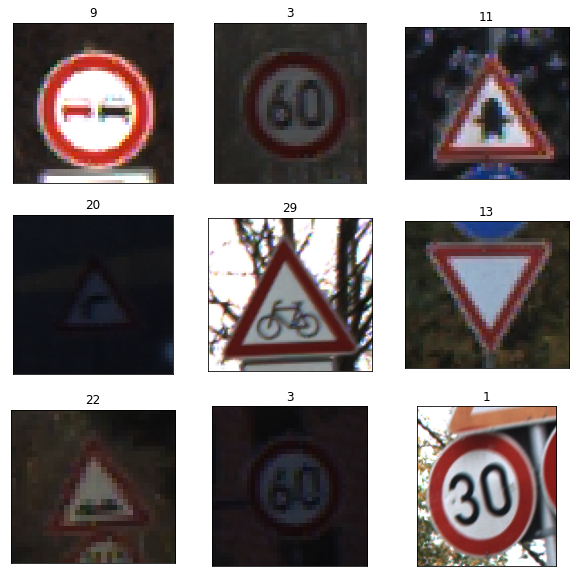

In [22]:
plot_df = train_df.sample(9).reset_index()
plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = "%d"%(plot_df.loc[i, 'ClassId'])
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('/content/Data - German Traffic Sign Recognition/Train/',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

#### Plotting the reference images in meta data folder, we see that these are proper images

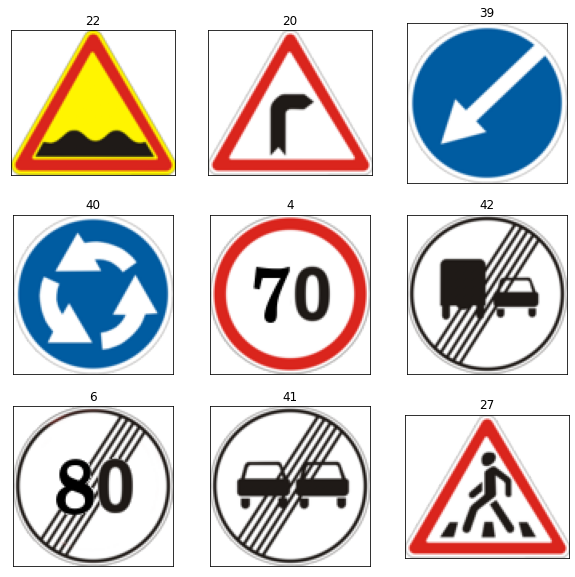

In [23]:
plot_df = test_df.sample(9).reset_index()
plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = "%d"%(plot_df.loc[i, 'ClassId'])
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('/content/Data - German Traffic Sign Recognition/Meta/',img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

#### We see that there is class imbalance in the training data some classes are overrepresented while some are underrepresented, so accuracy would be good if we are able to predict better in the majority class like label 38 vs label 37

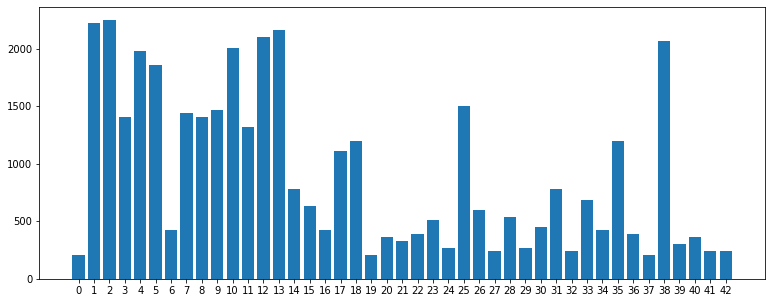

In [24]:
class_id_distribution = train_df['ClassId'].value_counts()
class_id_distribution.head(10)
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values);

#### For Meta folder (reference images) we have one image for each class label

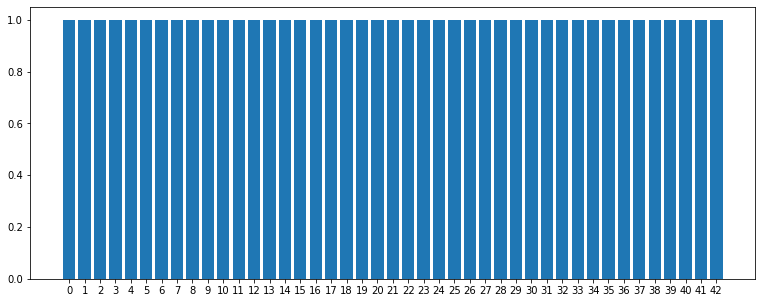

In [25]:
class_id_distribution = test_df['ClassId'].value_counts()
class_id_distribution.head(10)
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values);

### Define model (10 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [26]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import layers

nb_epoch = 30
rows, cols = 32, 32
n_channels = 3
batch_size = 128
n_classes = 43
n_filter = 30
n_pool = 2
n_conv = 3

from keras import backend as K
#K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_last')

model_conv = Sequential()
## If You preprocessed with gray scaling and local histogram equivalization then input_shape = (32,32,1) else (32,32,3)
model_conv.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(32, 32, 3)))
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2),padding='Valid'))
#model.add(BatchNormalization())
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2),padding='Valid'))
#model.add(BatchNormalization())
model_conv.add(Dropout(0.25))
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2),padding='Valid'))
#model.add(BatchNormalization())
model_conv.add(Dropout(0.5))
model_conv.add(Flatten())
model_conv.add(Dense(128, activation='relu'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(n_classes, activation='softmax'))

### Compile the model (5 Marks)
- Specify optimizer, loss & metrics

In [27]:
# build the model
#model = cnn_model()
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Get model summary (3 Marks)

In [28]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

### Fit the model (5 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath="/content/Data - German Traffic Sign Recognition/German_Traffic_ConvNetworkModel.hdf5"
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', 
                                  verbose=1, save_best_only=True)
callbacks_list_conv = [checkpoint_conv,early]

In [30]:
training_set.n

29416

In [31]:
history = model_conv.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,
               callbacks=callbacks_list_conv,validation_data=(x_val, y_val))

Epoch 1/100
230/230 [==============================] - 7s 18ms/step - loss: 3.3410 - accuracy: 0.1105 - val_loss: 1.9272 - val_accuracy: 0.3846

Epoch 00001: val_accuracy improved from -inf to 0.38456, saving model to /content/Data - German Traffic Sign Recognition/German_Traffic_ConvNetworkModel.hdf5
Epoch 2/100
230/230 [==============================] - 4s 17ms/step - loss: 1.8300 - accuracy: 0.4204 - val_loss: 1.2460 - val_accuracy: 0.6044

Epoch 00002: val_accuracy improved from 0.38456 to 0.60441, saving model to /content/Data - German Traffic Sign Recognition/German_Traffic_ConvNetworkModel.hdf5
Epoch 3/100
230/230 [==============================] - 4s 17ms/step - loss: 1.1448 - accuracy: 0.6178 - val_loss: 0.7710 - val_accuracy: 0.7471

Epoch 00003: val_accuracy improved from 0.60441 to 0.74706, saving model to /content/Data - German Traffic Sign Recognition/German_Traffic_ConvNetworkModel.hdf5
Epoch 4/100
230/230 [==============================] - 4s 17ms/step - loss: 0.7496 - 

### Draw plots (5 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

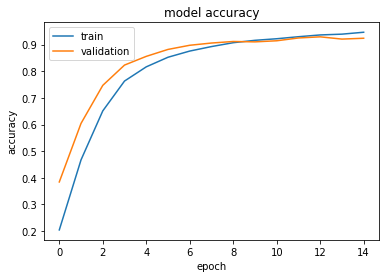

In [32]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

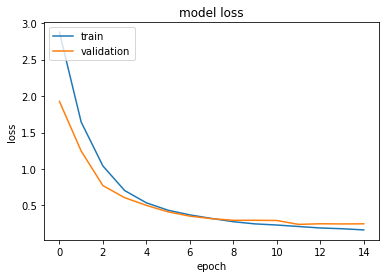

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Future work (ungraded)
- Try to apply transfer learning and see if you can improve the performance.
- Using transfer learning with VGG-16 to see if performance can be improved
- Using imagenet weights and including input shape compatible with current problem

In [36]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

58892288/58889256 [==============================] - 1s 0us/step


In [37]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

#### The first 19 layers are not trainable, we are using the weights as such

In [38]:
for layers in (vggmodel.layers)[:19]:
    #print(layers)
    layers.trainable = False

#### We are specifying are own outut layer as well with the number of classes and softmax activation function

In [39]:
vggmodel.summary(line_length=150)

flatten = Flatten()
new_layer2 = Dense(n_classes, activation='softmax', name='my_dense_2')

inp2 = vggmodel.input
out2 = new_layer2(flatten(vggmodel.output))

model_final = Model(inp2, out2)
model_final.summary(line_length=150)

Model: "vgg16"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
input_1 (InputLayer)                                               [(None, 32, 32, 3)]                                         0                      
______________________________________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                                              (None, 32, 32, 64)                                          1792                   
______________________________________________________________________________________________________________________________________________________
block1_conv2 (Conv2D)                                              (None, 32, 3

#### Compiling the model and specifying optimizer and metrics as before

In [40]:
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [41]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')
history2 = model_final.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,
               callbacks=[checkpoint,early],validation_data=(x_val, y_val))
model_final.save_weights("vgg16_1.h5")

Epoch 1/100
230/230 [==============================] - 6s 23ms/step - loss: 3.9731 - accuracy: 0.0387 - val_loss: 3.6699 - val_accuracy: 0.0618

Epoch 00001: val_accuracy improved from -inf to 0.06178, saving model to vgg16_1.h5
Epoch 2/100
230/230 [==============================] - 5s 20ms/step - loss: 3.6083 - accuracy: 0.0641 - val_loss: 3.5188 - val_accuracy: 0.0716

Epoch 00002: val_accuracy improved from 0.06178 to 0.07158, saving model to vgg16_1.h5
Epoch 3/100
230/230 [==============================] - 5s 20ms/step - loss: 3.4903 - accuracy: 0.0735 - val_loss: 3.4476 - val_accuracy: 0.0858

Epoch 00003: val_accuracy improved from 0.07158 to 0.08578, saving model to vgg16_1.h5
Epoch 4/100
230/230 [==============================] - 5s 20ms/step - loss: 3.4216 - accuracy: 0.0927 - val_loss: 3.3992 - val_accuracy: 0.1016

Epoch 00004: val_accuracy improved from 0.08578 to 0.10160, saving model to vgg16_1.h5
Epoch 5/100
230/230 [==============================] - 5s 20ms/step - loss:

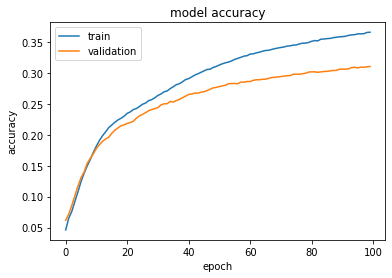

In [43]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

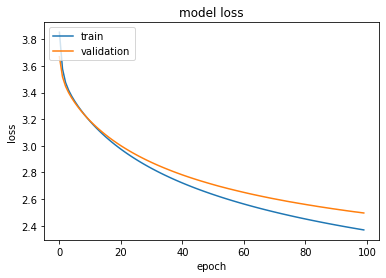

In [44]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Transfer learning using VGG-16 is not very helpful as we were able to get validation accuracy of 31.0% while in our trained model using own network we were able to achieve validation accuracy of 92.9%

In [47]:
%%shell
jupyter nbconvert --to html /content/Questions_Project_1_Computer_Vision_JPMC_v3.ipynb

[NbConvertApp] Converting notebook /content/Questions_Project_1_Computer_Vision_JPMC_v3.ipynb to html
[NbConvertApp] Writing 969012 bytes to /content/Questions_Project_1_Computer_Vision_JPMC_v3.html
